In [2]:
#impots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [3]:
#carregando os dados
df_dsa = pd.read_csv('dataset.csv')

In [4]:
#shape mostrando o tamanho do dataset, total de linhas e colunas
df_dsa.shape

(9700, 11)

In [5]:
#mostrando as 5 primeiras linhas do dataset
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
#amostra de as ultimas linhas do dataset
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


Analise Exploratoria

In [7]:
#colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
#verificando os tipos de dados de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
#resumo estatístico do dataset
df_dsa.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [10]:
#verficando se a duplicidade existe
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
#verificando se existem valores ausentes
#se haver valores ausentes deve ser resolvido porque e um problema
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Pergunta numero 1:
Qual cidade com Maior Valor de Venda de Produtos de Categoria 'Office Supplies'

In [13]:
#primeiro filtramos o df com os registros desejados
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [14]:
#Agrupar os dados por cidade e calcular a soma das vendas
df_dsa_p1_total = df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()

In [15]:
# Verificar se o dataframe não está vazio antes de usar idxmax
cidade_max_venda = df_dsa_p1_total.idxmax()
print(f'A cidade com maior venda de Office Supplies é: {cidade_max_venda}')

A cidade com maior venda de Office Supplies é: New York City


Pergunta Numero 2 
Qual total de vendas por data do pedido?

In [16]:
#calculando o total de vendas por cada pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

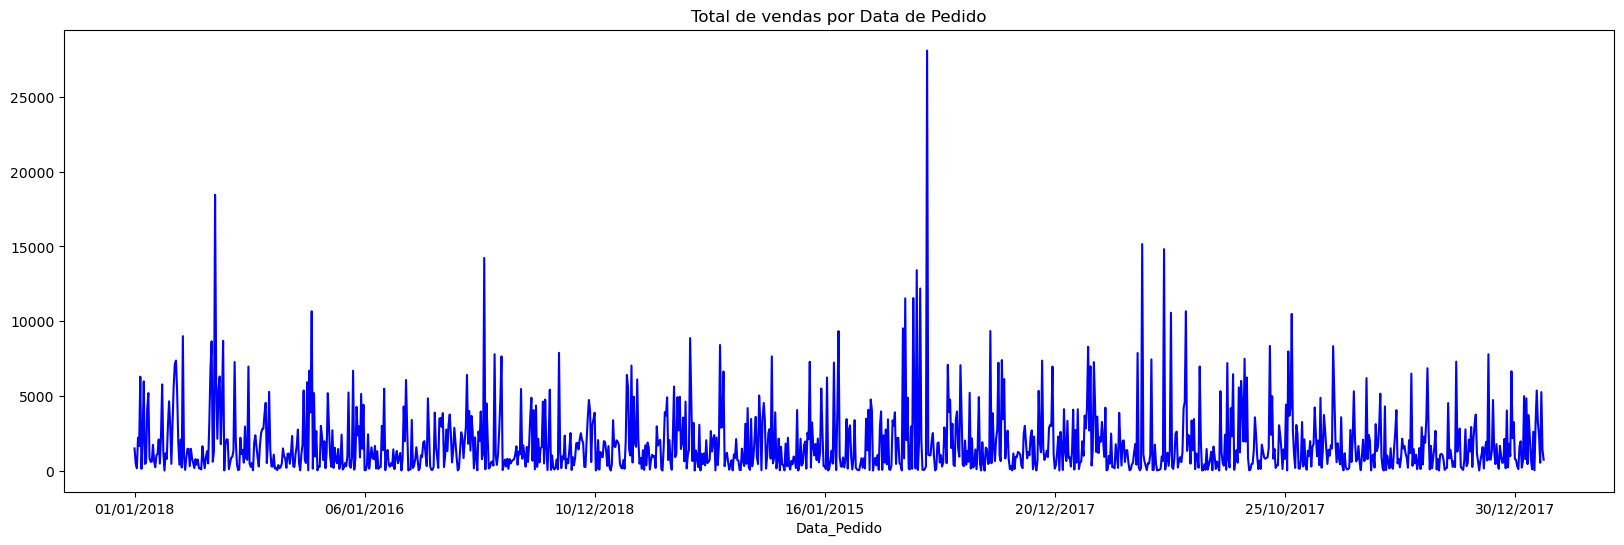

In [18]:
#Plot ou figura, essa alernativa nao e temporarl
#se pergunta fosse ao logo do tempo o script seria outro,convertendo a data para datetime
plt.figure(figsize=(20, 6))
df_dsa_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de vendas por Data de Pedido')
plt.show()

Pergunta de Negocio 3 
Qual o total de vendas por Estado

In [22]:
#Agrupar por estado e calcularmos o total de vendas
df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index() #reset_index()ajuda a criar uma index para nao perder o estado

In [ ]:
#Plot um grafico mais profissional para relatorios
plt.figure(figsize=(20, 6))
sns.barplot(data = df_dsa_p3,
            y='Valor_Venda',
            x='Estado',).set(title='Total de vendas por Estado')
plt.xticks(rotation= 80) #xticks sao textos do eixo x
plt.show()


Pergunta de Negocio Numero 4
Quais sao as 10 cidades com maior total de vendas?

In [24]:
#Agrupar por cidade, calculamos o total de vendas e ordenamos listando somente as 10 cidades com maior venda
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)

In [25]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


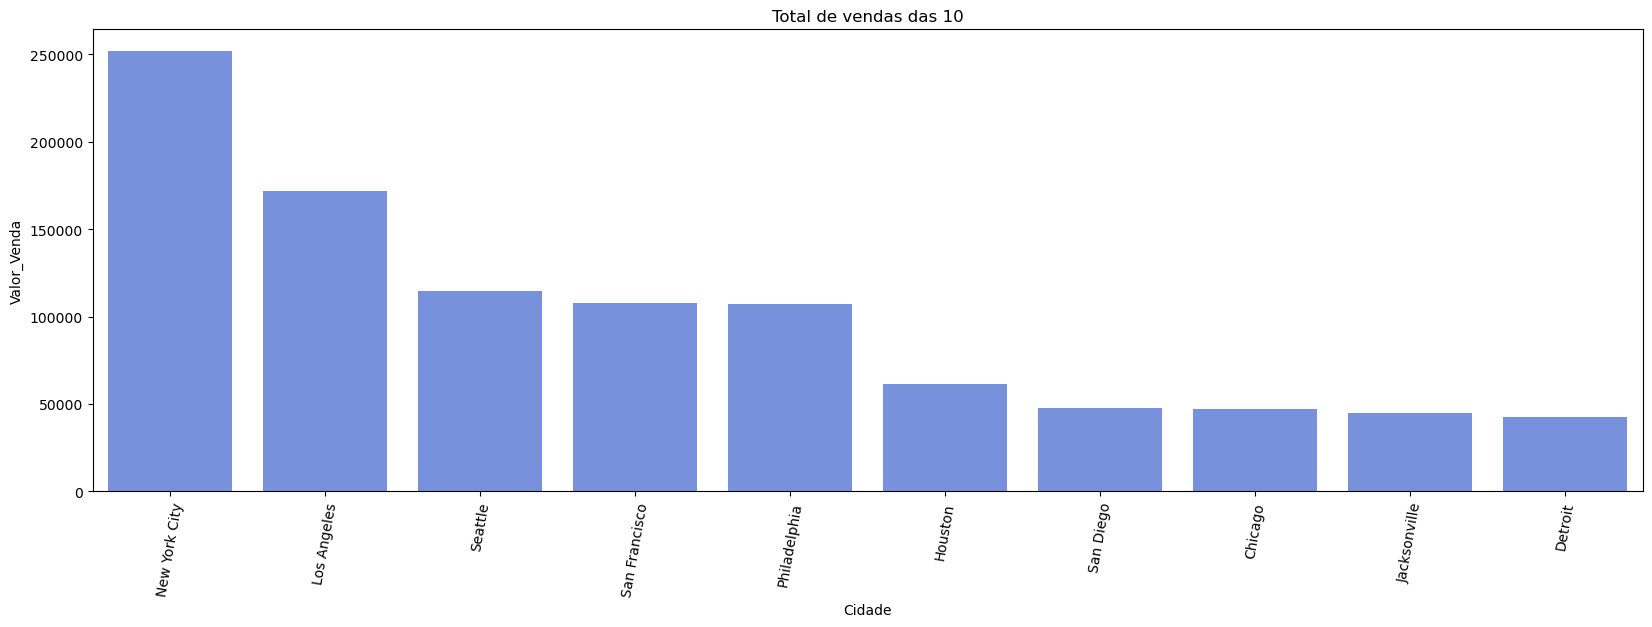

In [28]:
#Plot
plt.figure(figsize=(20, 6))
sns.set_palette('coolwarm') #definindo uma palete de cores
sns.barplot(data = df_dsa_p4,
            y='Valor_Venda',
            x='Cidade').set(title='Total de vendas das 10')
plt.xticks(rotation= 80)
plt.show()